# Modularity and Simulated annealing

**Definition**

The modularity Q of a graph is defined as follows:

$$Q= \sum_{i=1}^{n_c} \left[ \frac{l_c}{m} - \left(\frac{d_c}{2m}\right)^2 \right]$$

where:
- $n_c$ is the number of clusters
- $l_c$ the total number of edges joining vertices of cluster $c$
- $d_c$ the sum of the degrees of the vertices of cluster $c$

**Importation of necessary libraries**


In [37]:
import itertools
import matplotlib.pyplot as plt
import networkx as nx
import random
import math
from Utils import *
from simulated_annealing import plot_graph

ImportError: cannot import name 'plot_graph' from 'simulated_annealing' (/Users/chiararoverato/Documents/scolarite/Cours_CS/3A/ENS/Probabilistic Graphical Models/Projet/Graph-Clustering/simulated_annealing.py)

Our real dataset

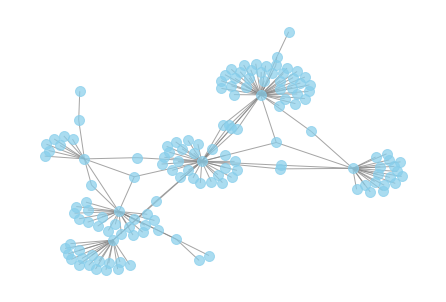

In [9]:
path="Datasets/CA-HepTh.txt"
G= nx.read_edgelist(path, comments='#',delimiter='\t')

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=False, node_size=100, node_color="skyblue", font_size=10, font_color="black", font_weight="bold", edge_color="gray", linewidths=1, alpha=0.7)
plt.show()

Finding best parameters via a grid search

In [12]:
# Appliquer la recherche en grille
iterations = 10000
temperature_range = np.arange(1.5, 3.5, 0.5)
cooling_rate_range = temperature_range/(iterations-1)
k_range = np.arange(3, 8, 1)
best_params, best_score = grid_search(G, temperature_range, cooling_rate_range, iterations, k_range)

print("Meilleurs paramètres:", best_params)
print("Meilleur score de modularité:", best_score)

Debug in grid_search:
Temperature range: [1.5 2.  2.5 3. ]
Cooling rate range: [0.00015002 0.00020002 0.00025003 0.00030003]
K range: [3 4 5 6 7]
Meilleurs paramètres: {'temperature': 3.0, 'cooling_rate': 0.00020002000200020003, 'iterations': 10000, 'k': 6}
Meilleur score de modularité: 0.6989490114464101


In [20]:
k=best_params['k']
temperature=best_params['temperature']
cooling_rate=best_params['cooling_rate']
initial_partition = {node: random.randint(0,k) for node in G.nodes()}
# Appliquer le Simulated Annealing
final_partition, final_score, scores = simulated_annealing(G, initial_partition, temperature, cooling_rate, iterations)

# Afficher les résultats
print("Final Partition:", final_partition)
print("Final Modularity Score:", final_score)


# plt.plot(scores)
# plt.title("scores")
# plt.show()

Final Partition: {'24325': 5, '24394': 1, '40517': 5, '58507': 5, '3737': 1, '3905': 1, '7237': 1, '12715': 2, '13648': 2, '13659': 1, '13664': 1, '14304': 1, '14823': 1, '17370': 2, '18956': 1, '19615': 1, '19660': 1, '21669': 2, '23106': 1, '24832': 1, '26021': 4, '26363': 1, '28240': 1, '35376': 1, '35424': 1, '36383': 1, '36860': 4, '37616': 1, '37932': 1, '39984': 1, '41687': 1, '44934': 2, '48192': 1, '51464': 1, '55079': 1, '59077': 1, '59471': 1, '59870': 1, '61742': 4, '61796': 1, '62227': 1, '65346': 1, '66689': 1, '67851': 1, '24897': 3, '30545': 3, '42653': 3, '1182': 3, '3175': 3, '5379': 3, '33426': 5, '34071': 3, '36192': 3, '39688': 3, '63113': 3, '65086': 3, '66829': 3, '68041': 3, '554': 4, '3088': 2, '4503': 2, '4521': 2, '6142': 2, '9117': 2, '11180': 2, '12981': 2, '13769': 2, '20394': 2, '21477': 2, '22916': 6, '24295': 2, '28268': 2, '33726': 2, '40894': 2, '44594': 2, '45385': 4, '46139': 2, '49541': 2, '50970': 2, '53159': 6, '55835': 2, '56948': 2, '57628': 2,

In [30]:
def plot_adj(G,partition):
    ordered_nodes = sorted(partition.keys(), key=lambda x: partition[x])
    reordered_matrix = nx.to_numpy_array(G, nodelist=ordered_nodes)    
    plt.imshow(reordered_matrix, cmap='gray')
    plt.title("Reordered Adjacency Matrix")
    plt.show()

In [34]:
plot_graph(G,final_partition)

NameError: name 'plot_graph' is not defined